# Introduction 
* Dataset contain information about the 500 student who have applied to different colleges for their masters course & contain information about different parameter that are used by universites to judge the merit of candidate.

## Different parameter information
* GRE Score   = (Graduate Record Exam) test is a standardised test used to fetch admission in various school and business    graduate colleges in various countries,especially USA.

* TOEFL Score = (Test of English as a Foreign Language), you need to have passed in 10+2 from any recognized Indian Board or University. The test measures your Proficiency in the English Language so that you can study and work in the United States. Candidates of any age can take the TOEFL exam.

* University Ranking = Student undergraduate university ranking.

* SOP  = (Statement of Purpose strength), is a reflection of your personality that you portray in front of the admissions committee for getting enrolled in universities abroad.

* LOR  = Letter of Recommendation strength.

* CGPA = (Cumulative Grade point Average),it is used for colleges to measure the Overall Acadmic performance of a student for year and the total score.

* Research = Whether student has research experience or not.

* Chance of Admit = Admission chance





In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)
from scipy import stats as st

In [331]:
df = pd.read_excel('.\Admission_Prediction.xlsx')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


### Columns in dataframe

In [332]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

* dataset contain total 9 columns 

### Exmine the data

In [333]:
df.shape

(500, 9)

* Total 500 observation with 9 columns

In [334]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


* Dataset contain all type of data

### Changing the column name 

In [336]:
df.rename({'GRE Score':'GRE_score','TOEFL Score':'TOEFL_score','University Rating':'University_rating',
          'Chance of Admit':'Chance_of_admit'},axis=1,inplace=True)

In [337]:
df.head()

,Serial No.,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


### cheack the statistics

In [338]:
df.describe()

,Serial No.,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


* It clearly seen 290 is minimum and 340 is maximum GRE score as well as TOEFL score range around (92 to 120)
* The university rating, SOP & LOR  between 1 to 5 , and CGPA ranging around (6 to 9) as well as maximum students have 1  research experiance 

## Explotary Data Analysis

### Univarite Analysis

In [339]:
## dropping the NAN value
df1 = df.dropna(how='any',subset=['GRE_score'])


In [340]:
df1.isnull().sum()

Serial No.            0
GRE_score             0
TOEFL_score          10
University_rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_admit       0
dtype: int64

In [341]:
df1.GRE_score.value_counts()

GRE_score
312.0    22
324.0    22
322.0    17
321.0    17
316.0    17
327.0    17
314.0    16
320.0    16
311.0    16
325.0    15
317.0    15
315.0    13
308.0    13
326.0    12
313.0    12
300.0    12
323.0    12
318.0    12
319.0    12
305.0    11
304.0    11
310.0    10
329.0    10
307.0    10
298.0    10
301.0    10
331.0     9
340.0     9
299.0     8
330.0     8
328.0     8
309.0     8
332.0     7
334.0     7
306.0     7
297.0     6
302.0     6
296.0     5
295.0     5
336.0     5
303.0     5
338.0     4
335.0     4
333.0     4
339.0     3
337.0     2
290.0     2
294.0     2
293.0     1
Name: count, dtype: int64

In [342]:
df1.GRE_score.describe()

count    485.000000
mean     316.558763
std       11.274704
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE_score, dtype: float64

In [343]:
st.mode(df1.GRE_score)

ModeResult(mode=312.0, count=22)

-0.051526589650809675
-0.6897763513810626


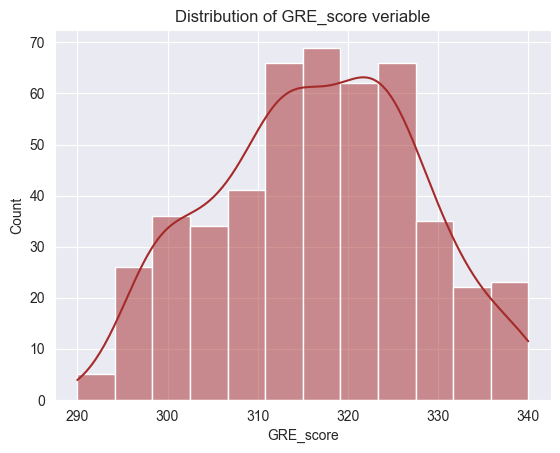

In [344]:
## ploting the histogram becuase line plot not given proper information
sns.set_style('darkgrid')
sns.histplot(df.GRE_score,kde=True,color='brown')
plt.title('Distribution of GRE_score veriable')
print(st.skew(df1.GRE_score))
print(st.kurtosis(df1.GRE_score))
plt.show()

#### Obsrvation:-
* GRE-Score are very close to noraml distribution with small negative skewed(left side skewed)
* In this plot 290 is minimum GRE-Score and the most comman Score between 310 to 325.
* Average of GRE-Score is 316 with 11.27 standrad deviation

In [345]:
## Toefl score
## drop the NAN value
df2 = df.dropna(how='any',subset=['TOEFL_score'])
df2.isnull().sum()


Serial No.            0
GRE_score            15
TOEFL_score           0
University_rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_admit       0
dtype: int64

In [346]:
df2.TOEFL_score.value_counts()

TOEFL_score
110.0    42
105.0    37
104.0    29
107.0    28
112.0    27
106.0    26
103.0    25
100.0    24
102.0    24
99.0     22
111.0    20
101.0    19
114.0    18
108.0    18
109.0    18
113.0    18
116.0    16
115.0    11
118.0    10
98.0     10
119.0    10
120.0     9
117.0     8
97.0      7
96.0      6
95.0      3
93.0      2
94.0      2
92.0      1
Name: count, dtype: int64

In [347]:
df2.TOEFL_score.describe()

count    490.000000
mean     107.187755
std        6.112899
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL_score, dtype: float64

In [348]:
st.mode(df2.TOEFL_score)

ModeResult(mode=110.0, count=42)

0.10175501382297036
-0.6700233932074711


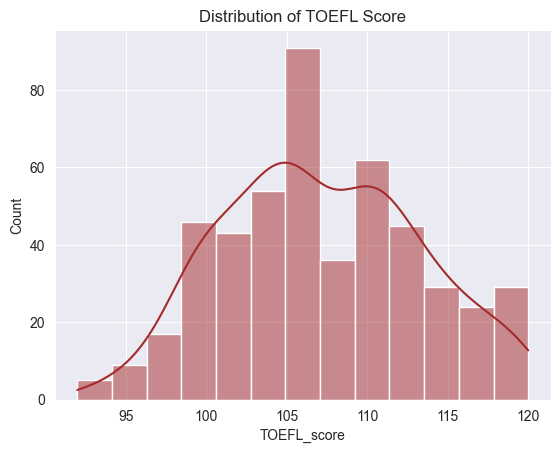

In [349]:
sns.set_style('darkgrid')
sns.histplot(df2.TOEFL_score,kde=True,color='brown')
plt.title('Distribution of TOEFL Score')
print(st.skew(df2.TOEFL_score))
print(st.kurtosis(df2.TOEFL_score))

#### Observation:-
* TOEFL_score are normally distributed with small positive skew
* Minimum TOEFL_score is 92 & maximum TOEFL score is 120.
* The average of TOEFL_score is 107 with 6 standard deviation
* The most comman TOEFL_score is 110,104,105,107

In [350]:
## University_rating

df3 = df.dropna(how='any',subset=['University_rating'])
df3.isnull().sum()

Serial No.            0
GRE_score            15
TOEFL_score          10
University_rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_admit       0
dtype: int64

In [351]:
## University_rating
df.University_rating.value_counts()


University_rating
3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: count, dtype: int64

In [352]:
df.University_rating.describe()

count    485.000000
mean       3.121649
std        1.146160
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University_rating, dtype: float64

* The average of column is 3.21 with 1.14

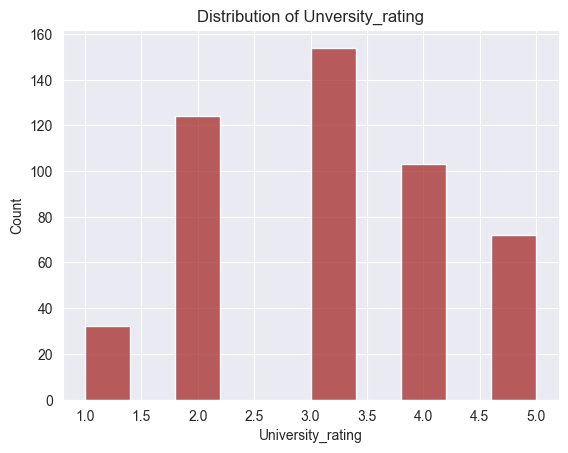

In [353]:
sns.set_style('darkgrid')
sns.histplot(df3.University_rating,color='brown')
plt.title('Distribution of Unversity_rating')
plt.show()


#### Observation:-
* Most of the (154) student get 3 University rating. 
* (153) Student get 2 University rating.

In [354]:
## SOP
df.SOP.value_counts()

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64

In [355]:
df.SOP.describe()

count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64

* The average of SOP(statement of purpose strength) is 3.37 with 0.99 standard deviation
* Maximum 5 & Minimum 1 SOP

-0.22828490586525177
-0.7106555639324257


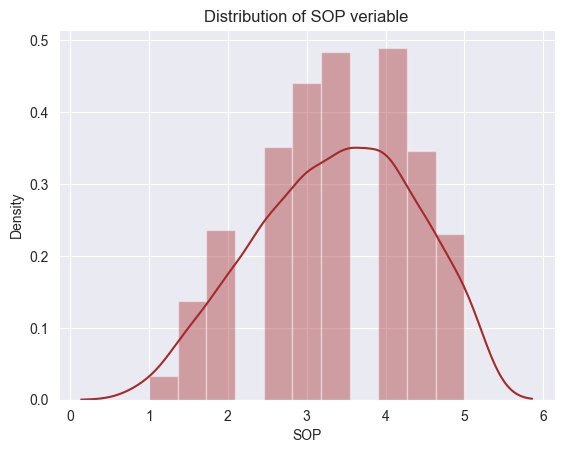

In [356]:
sns.distplot(df.SOP,color='brown')
plt.title('Distribution of SOP veriable')
print(st.skew(df.SOP))
print(st.kurtosis(df.SOP))
plt.show()


#### Observation:-
* Most of the (SOP)Statment of purpose between 3 to 4
* SOP is very close to normal distribution with small negative skewed & kurtosis

In [357]:
## LOR
df.LOR.value_counts()

LOR
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64

In [358]:
df.LOR.describe()

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64

* The average of LOR is 3 with 0.92 standard deviation
* Maximum LOR is 5 and Minimum LOR is 1

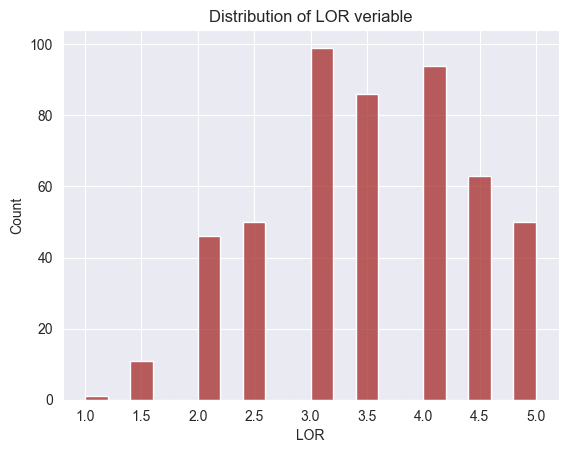

In [359]:
sns.histplot(df.LOR,bins=20,color='brown')
plt.title('Distribution of LOR veriable')
plt.show()

#### Obsevartion:-
* The most of the student rated the Letter of Recommendation strength between 3 to 4


In [360]:
## CGPA
df.CGPA.value_counts()

CGPA
8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
8.56    7
8.65    6
7.88    6
9.11    6
9.04    6
8.66    6
9.02    6
8.64    6
8.34    6
8.50    6
9.23    5
8.27    5
8.02    5
8.22    5
7.86    5
7.65    5
9.36    5
8.26    5
8.78    5
8.13    5
9.16    5
7.89    5
8.80    5
8.67    5
7.64    5
8.20    5
8.10    5
9.10    5
9.00    5
9.08    4
8.40    4
9.14    4
9.13    4
8.30    4
8.77    4
8.96    4
8.43    4
7.90    4
8.46    4
8.97    4
8.03    4
9.45    4
8.33    4
8.48    4
8.79    4
9.22    4
9.66    3
8.44    3
8.57    3
8.16    3
8.36    3
7.46    3
8.62    3
9.12    3
8.73    3
8.87    3
8.24    3
9.44    3
8.74    3
9.06    3
8.75    3
8.69    3
7.68    3
8.04    3
9.01    3
8.37    3
8.53    3
8.18    3
8.68    3
8.01    3
7.95    3
9.60    3
8.42    3
7.80    3
7.66    3
9.80    3
8.90    3
8.21    3
8.60    2
7.34    2
9.25    2
8.32    2
8.94    2
7.70    2
8.17    2
9.87    2
9.40    2
7.50    2
9.34    2
9.26    2
8.49    2
7.98    2
9.70    2
8.07    2
9.17 

In [361]:
df.CGPA.describe()

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64

* The average mean of CGPA is 8.57 with 0.60 standard deviation
* Maximum CGPA is 9.92 & Minimum CGPA is 6.80.

-0.02653261314181717
-0.5676573553864674


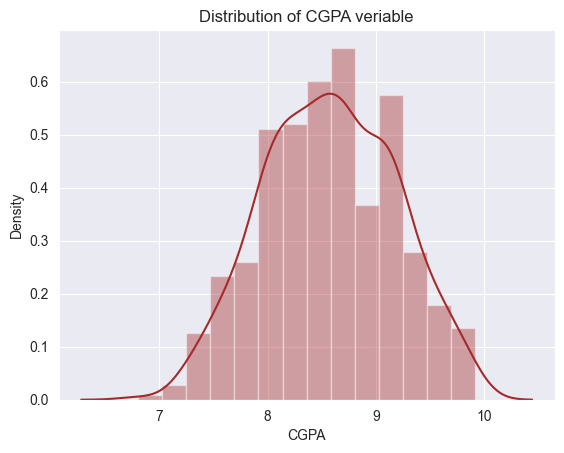

In [362]:
sns.distplot(df.CGPA,kde=True,color='brown')
plt.title('Distribution of CGPA veriable')
print(st.skew(df.CGPA))
print(st.kurtosis(df.CGPA))
plt.show()

#### Observation:- 
* It clearly seen CGPA is very close to normal distribution with small negative (left)skewed & kurtosis

In [363]:
## Research
df.Research.value_counts()


Research
1    280
0    220
Name: count, dtype: int64

In [364]:
df.Research.describe()

count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64

* The average of Research is 0.56 with 0.49 standard deviation

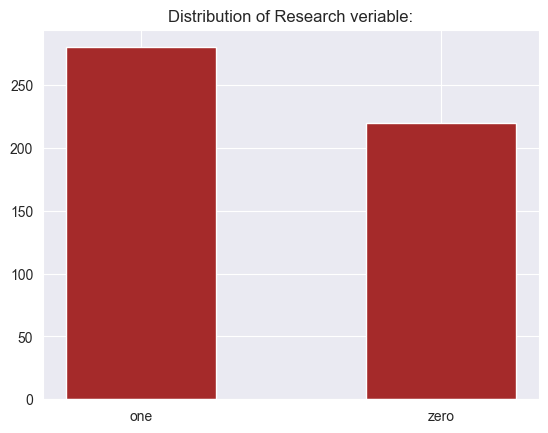

In [365]:
data = {'one':280,'zero':220} ##Make the dictionary beacuse of only two value counts

yes = list(data.keys())
no  = list(data.values())

plt.bar(yes,no,color='brown',width=0.5)
plt.title('Distribution of Research veriable:' )
plt.show()

#### Observation:-
* Almost 280 Student have research experiance & other student are not research experince.

### Bivariate Analysis & Multivariate analysis

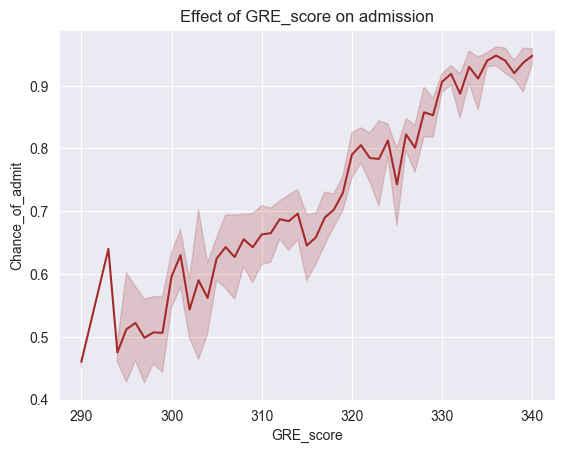

In [366]:
#### cheak the relationship between Gre_score & Chance_of_admit with university rating
sns.lineplot(x='GRE_score',y='Chance_of_admit',data=df,color='brown')
plt.title('Effect of GRE_score on admission')
plt.show()


#### Observation:-
* If GRE-score is incresing chance of admission also increasing

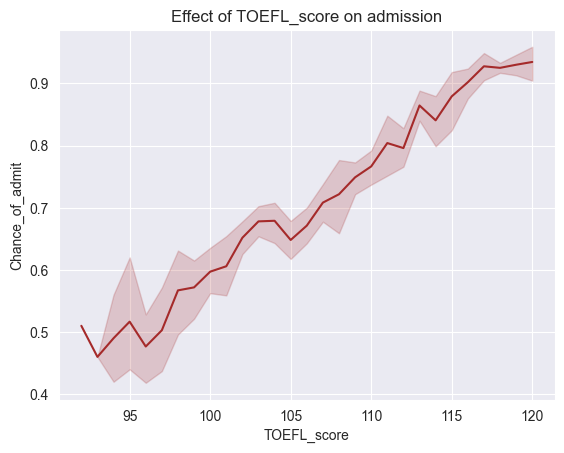

In [367]:
#### cheak the relationship between TOEFL-score & Chance_of_admit with university rating
sns.lineplot(x='TOEFL_score',y='Chance_of_admit',data=df,color='brown')
plt.title('Effect of TOEFL_score on admission')
plt.show()


#### Observation:-
* If TOEFL-score increasing chance of admission also increasing

In [368]:
df.head()

,Serial No.,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


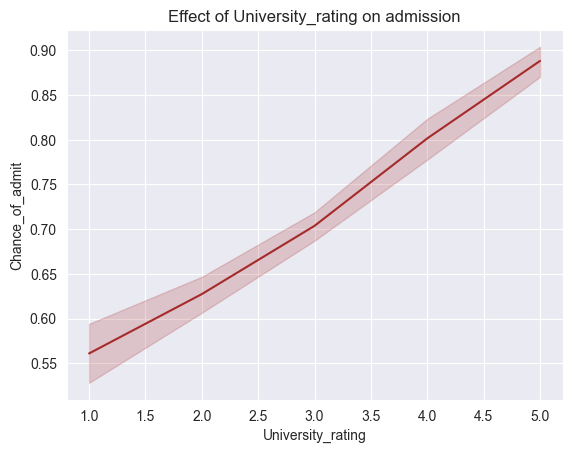

In [369]:
#### cheak the relationship between university rating & Chance_of_admit with university rating

sns.lineplot(x='University_rating',y='Chance_of_admit',data=df,color='brown')
plt.title('Effect of University_rating on admission')
plt.show()


#### Observation:-
* In this plot clearly seen that if student have 5 university rating student have more chance to get admission.


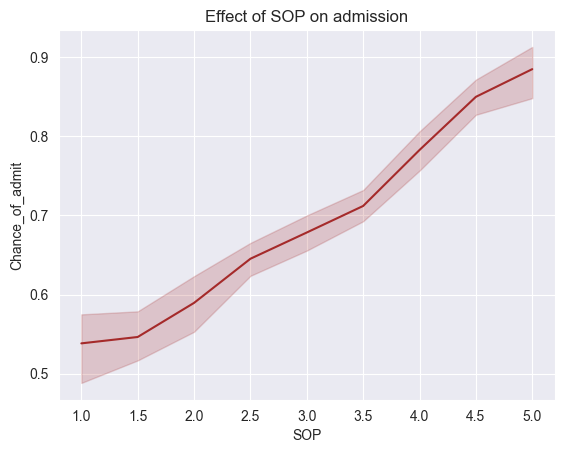

In [370]:
#### cheak the relationship between SOP & Chance_of_admit with university rating

sns.lineplot(x='SOP',y='Chance_of_admit',data=df,color='brown')
plt.title('Effect of SOP on admission')
plt.show()


#### Observation:-
* If SOP range between 4 to 5 then most chance of admission of student

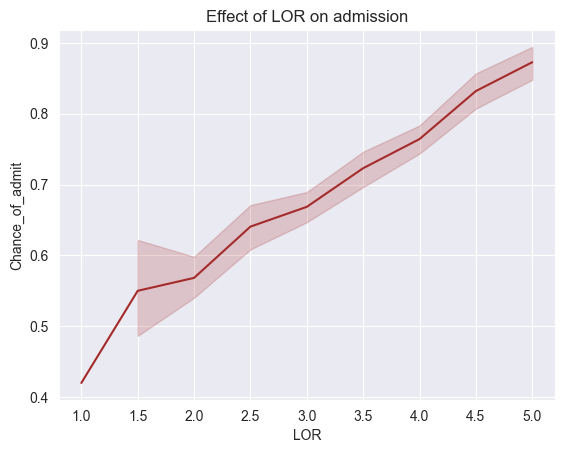

In [371]:
#### cheak the relationship between LOR & Chance_of_admit with university rating

sns.lineplot(x='LOR',y='Chance_of_admit',data=df,color='brown')
plt.title('Effect of LOR on admission')
plt.show()


#### Observation:-
* If LOR score increasing admission of chance also increasing

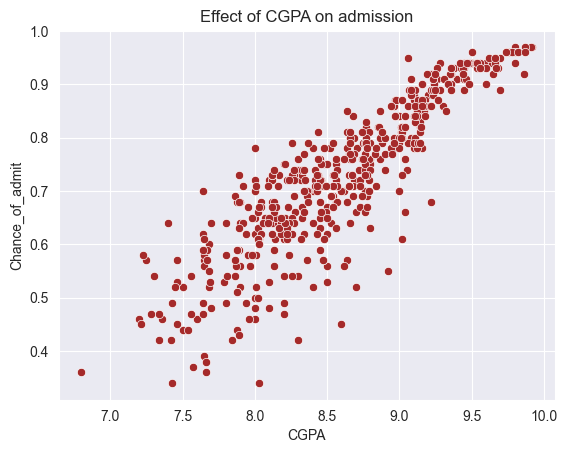

In [372]:
#### cheak the relationship between CGPA & Chance_of_admit with university rating

sns.scatterplot(x='CGPA',y='Chance_of_admit',data=df,color='brown')
plt.title('Effect of CGPA on admission')
plt.show()


#### Observation:-
* If CGPA incresing chance of admission also incresing


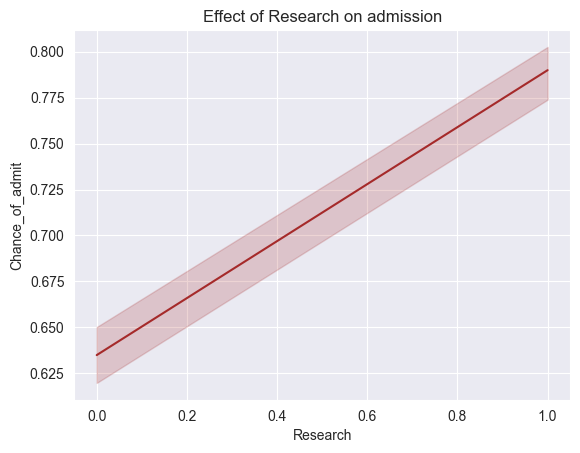

In [373]:
#### cheak the relationship between Research & Chance_of_admit with university rating

sns.lineplot(x='Research',y='Chance_of_admit',data=df,color='brown')
plt.title('Effect of Research on admission')
plt.show()


#### Observation:-
* If researchers are increase more chance to get admission 

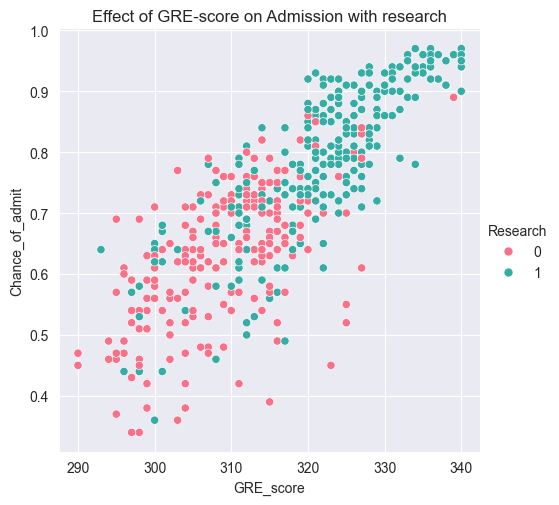

In [374]:
## cheack the relationship between gre-scor and chance of admit
sns.relplot(x='GRE_score',y='Chance_of_admit',data=df,hue='Research',palette='husl')
plt.title('Effect of GRE-score on Admission with research')
plt.show()

#### Observation:-
* If the student are not research then GRE_score and chance of admission are decrease.
* If the student do research then GRE_score and chance of admissiom are increase.

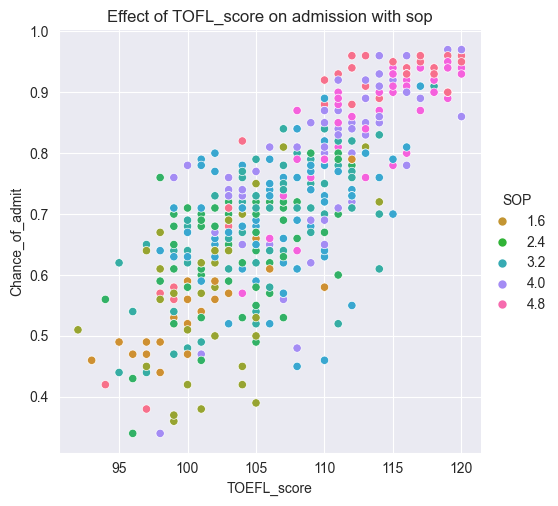

In [375]:
## cheack the relation between TOEFL_score and chance of admit
sns.relplot(x='TOEFL_score',y='Chance_of_admit',data=df,hue='SOP',palette='husl')
plt.title('Effect of TOFL_score on admission with sop')
plt.show()

#### Observation :- 
* If SOP (Statement of Purpose strength) range between 1.6 to 3.2 the TOEFL_score and chance of admission are decreases
* SOP range between 4 to 4.8  the TOEFL_score and chance of admission are increses

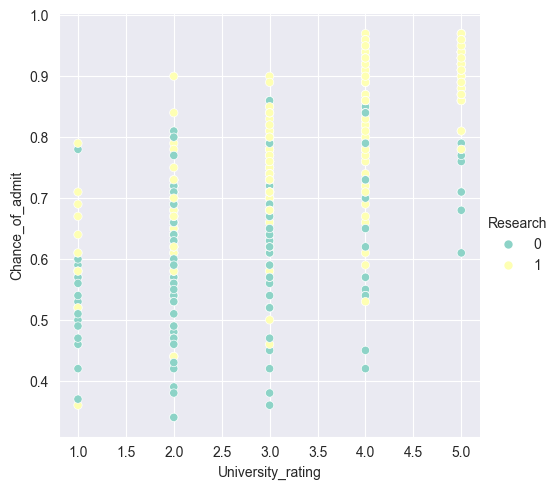

In [376]:
## cheack the relationship between University_rating and chance of admission 
sns.relplot(x='University_rating',y='Chance_of_admit',data=df,hue='Research')
plt.show()

#### Observation:- 
* If the university rating range between 3 to 5 with research chance of admission are inccrese

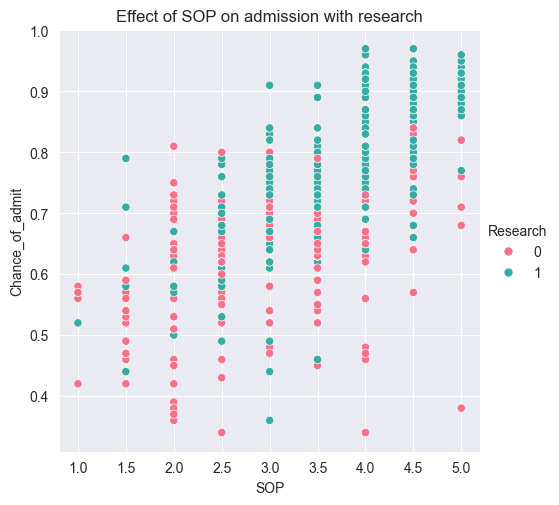

In [377]:
## Cheack the relationship between SOP and Chance_of_admit
sns.relplot(x='SOP',y='Chance_of_admit',data=df,hue='Research',palette='husl')
plt.title('Effect of SOP on admission with research')
plt.show()

#### Observation:-
* In this plot 3, 5 SOP & researchers student more chance to get admission and SOP range between (1,2.5) and no-researchers student admission chane are decrease 

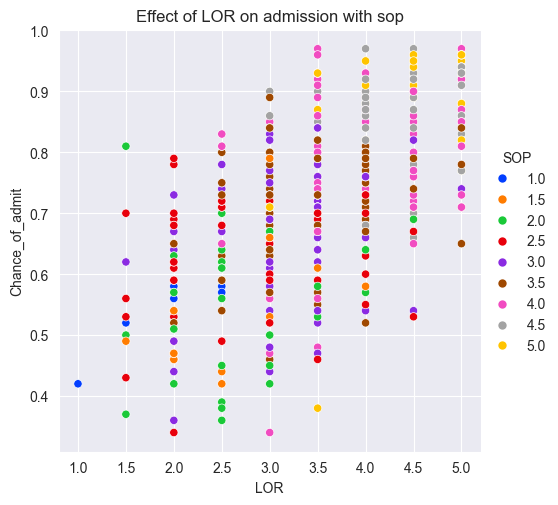

In [378]:
## cheack the relationship between LOR & Chance_of_admit
sns.relplot(x='LOR',y='Chance_of_admit',data=df,hue='SOP',palette='bright')
plt.title('Effect of LOR on admission with sop')
plt.show()


#### Observation:-
* In this plot LOR & SOP are same range between 3 to 5 higher chance to get admission and 1 to 2.5 SOP & LOR lower chance to get admission 

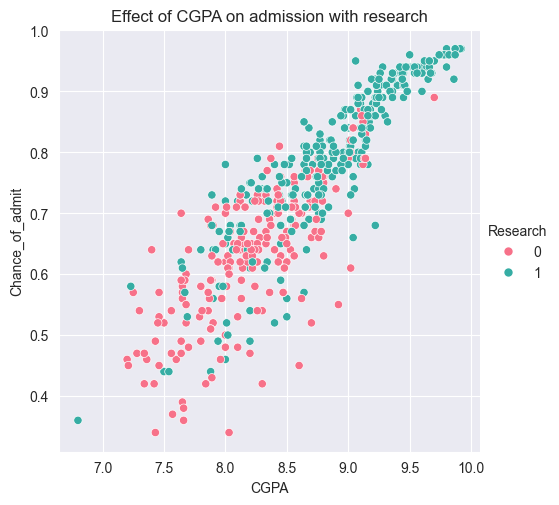

In [379]:
## cheack the relationship between CGPA & Chance_of_admit with Research feature
sns.relplot(x='CGPA',y='Chance_of_admit',data=df,hue='Research',palette='husl')
plt.title('Effect of CGPA on admission with research')
plt.show()

#### Observation:-
* More CGPA & research reqiured to increase the chance of admission 

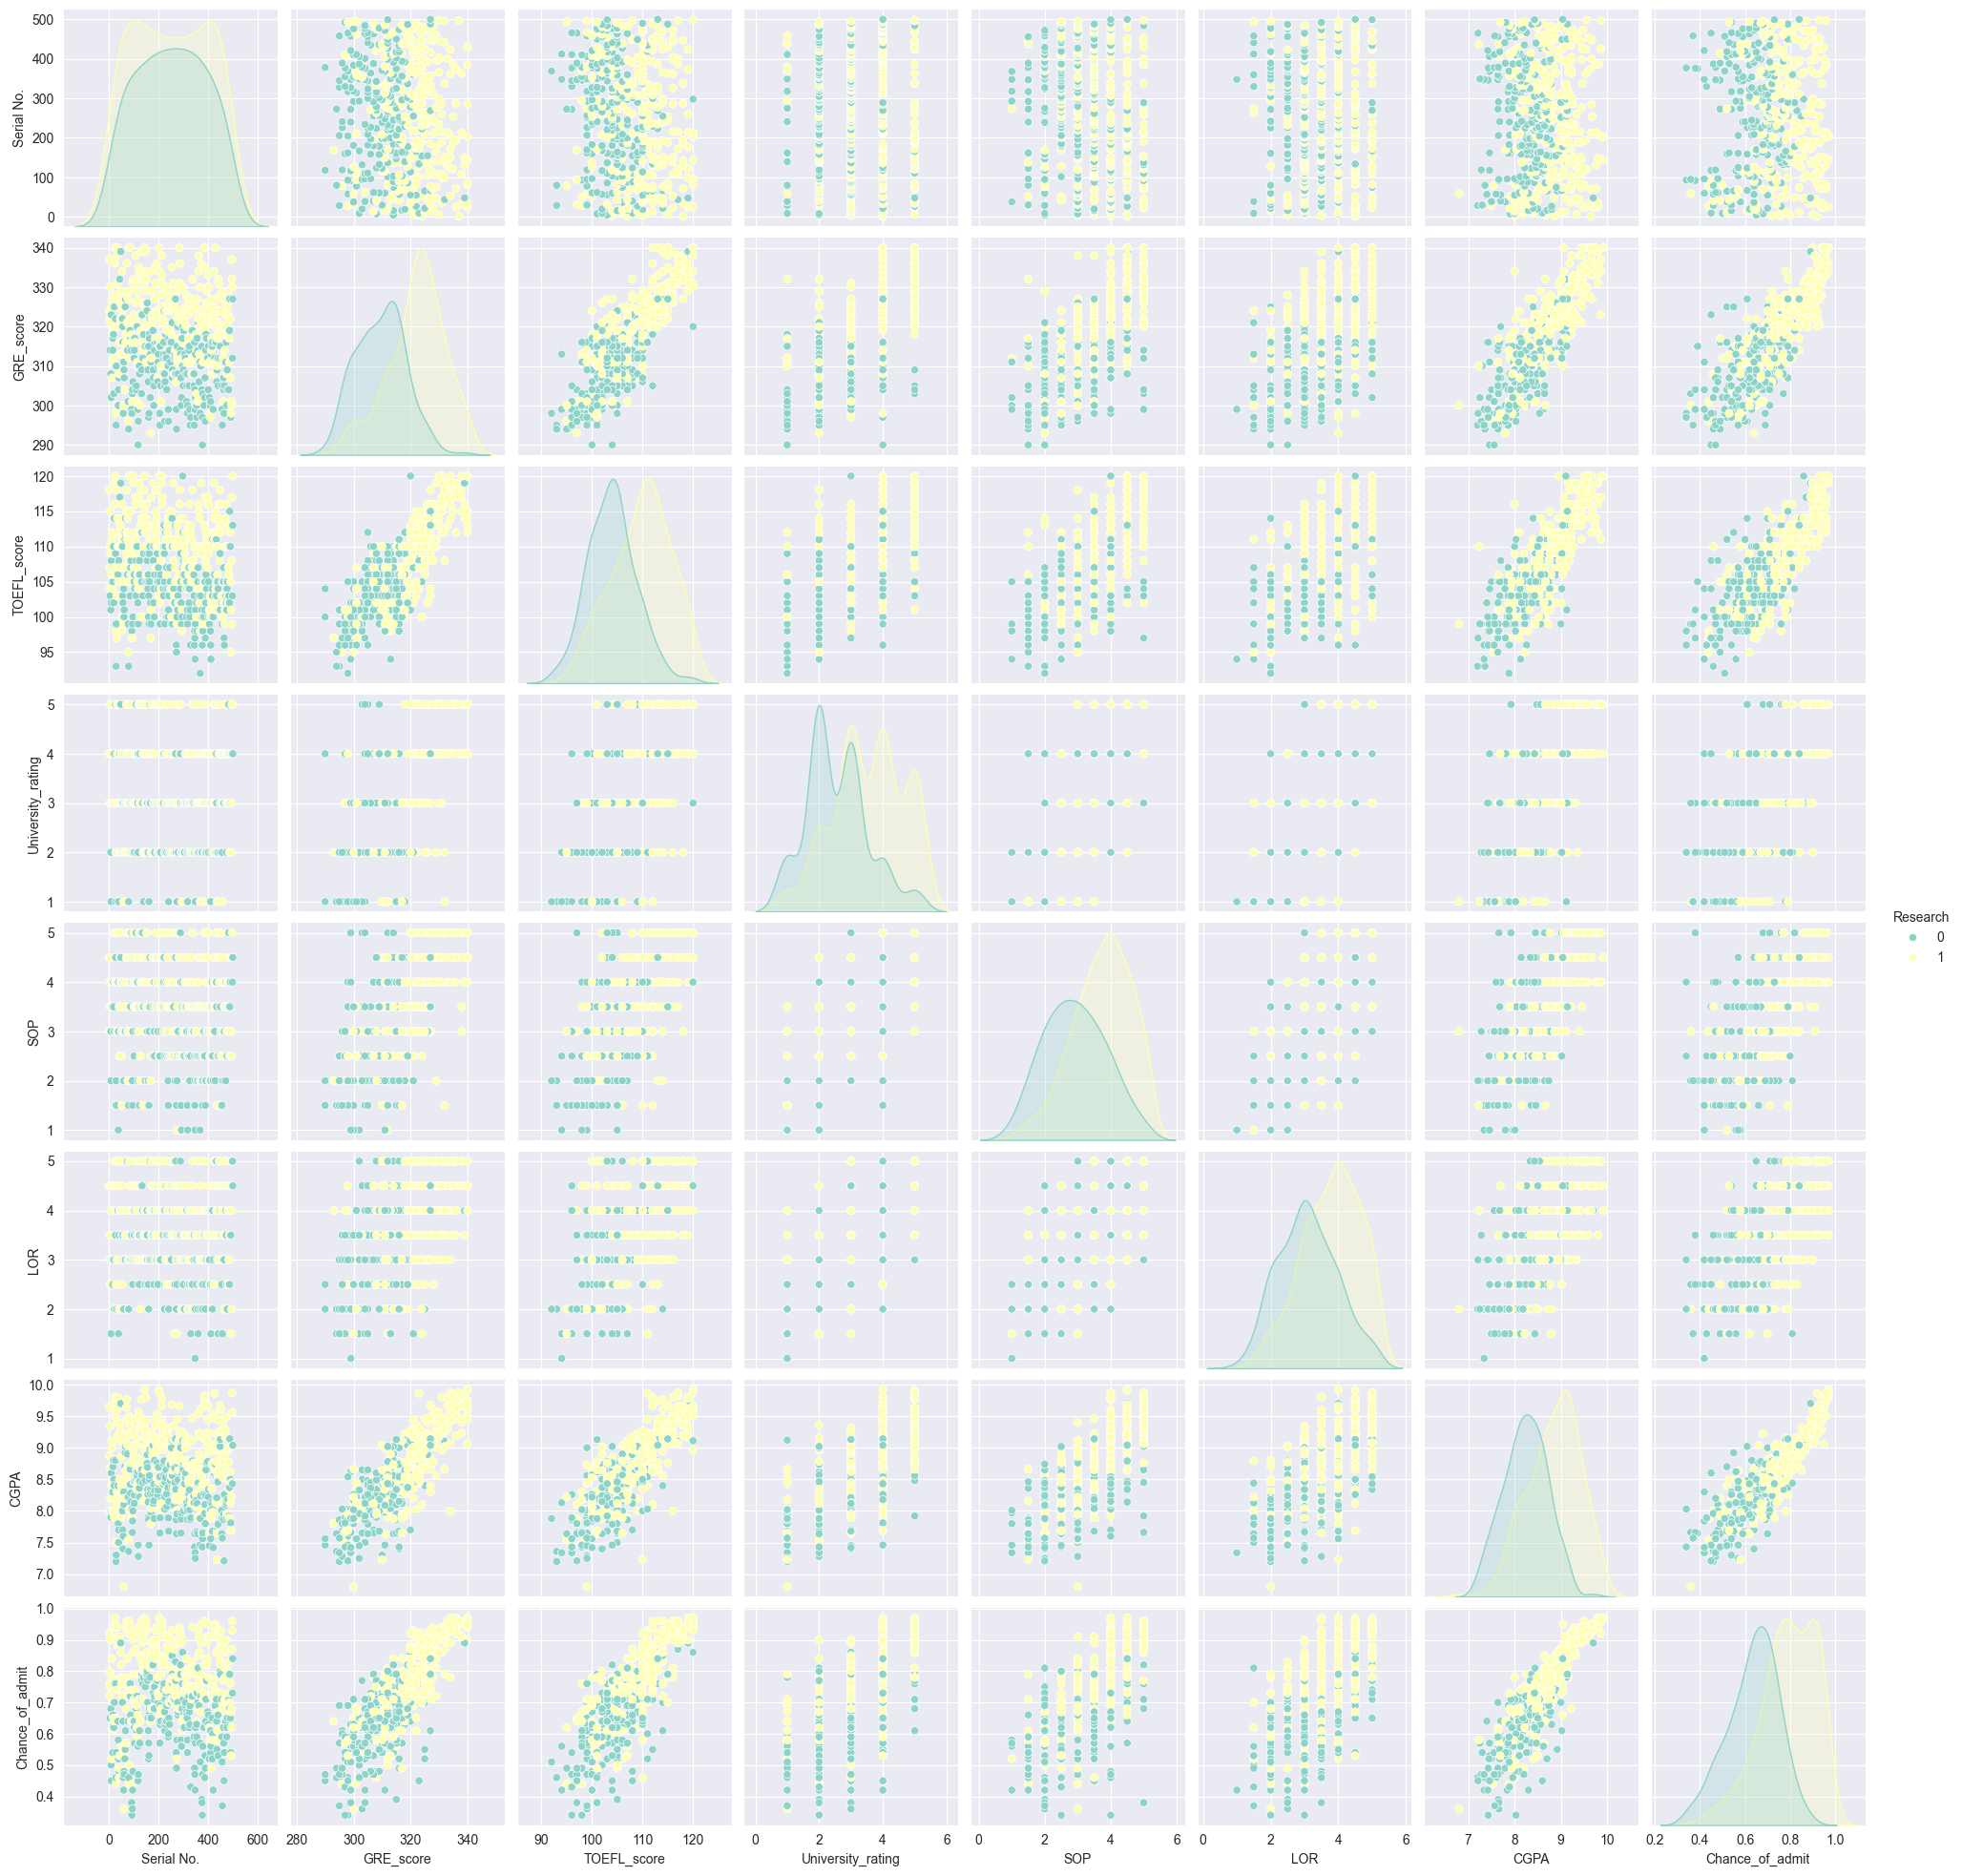

In [380]:
sns.pairplot(data=df,hue='Research')
plt.show()

#### Observation:-
* In this plot clearly seen the admission is mostly depend on LOR,SOP,CGPA,University rating scores.

## Feature Engineering / Data Preprocessing

## Imputing the missing value
* In dataset 3 columns are missing value 
* 1. GRE Score   = 15(missing value)
* 2. TOEFL Score = 10(missing value)
* 3. University Rating =15(missing value)



In [381]:
df.isnull().sum()

Serial No.            0
GRE_score            15
TOEFL_score          10
University_rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_admit       0
dtype: int64

In [382]:
df.loc[df['GRE_score'].isnull()==True,'GRE_score']=df['GRE_score'].mean()
df.loc[df['TOEFL_score'].isnull()==True,'TOEFL_score']=df['TOEFL_score'].mean()
df.loc[df['University_rating'].isnull()==True,'University_rating']=df['University_rating'].mean()

In [383]:
df.isnull().sum()

Serial No.           0
GRE_score            0
TOEFL_score          0
University_rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_admit      0
dtype: int64

In [384]:
df.drop('Serial No.',axis=1,inplace=True)

### Outlier handling

In [385]:
df.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


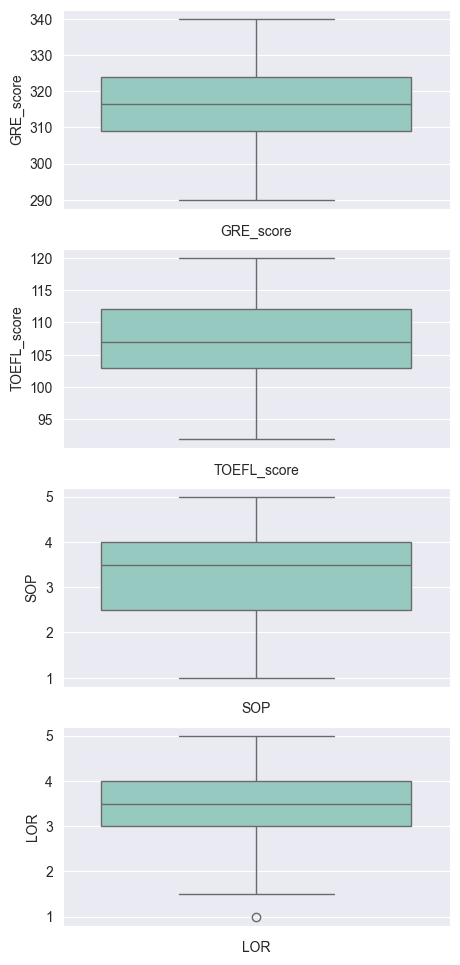

In [386]:
box = df[['GRE_score','TOEFL_score','SOP','LOR']]
plt.figure(figsize=(5,15),facecolor='white')
plotno = 1 ##counter

for column in box:
    if plotno<=5:
        plt.subplot(5,1,plotno)
        sns.boxplot(box[column])
        plt.xlabel(column,fontsize=10)
        plotno+=1

#### Observation:- 
* Their is no outlier in three veraible(GRE_score,TOEFL_score,SOP)
* Only one minor outlier in LOR

### Feature selection

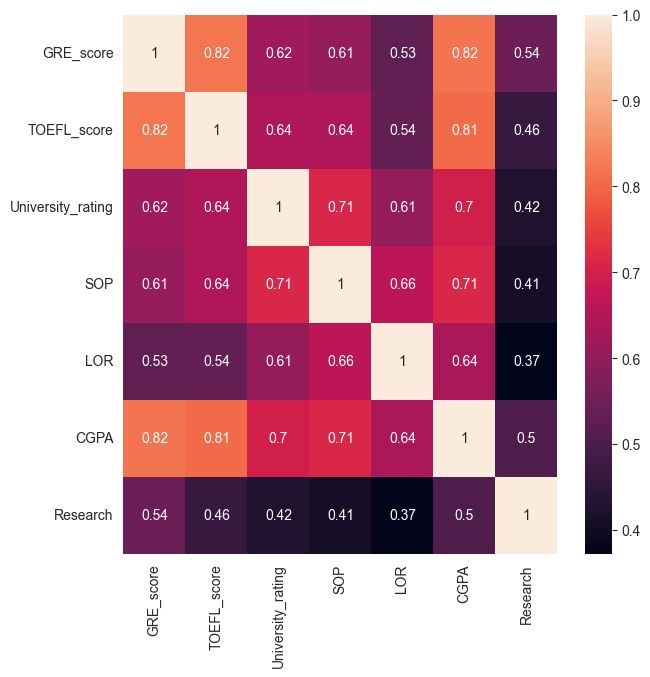

In [387]:
df_corr = df[['GRE_score','TOEFL_score','University_rating','SOP','LOR','CGPA','Research']]
plt.figure(figsize=(7,7))
sns.heatmap(df_corr.corr(),annot=True)
plt.show()

### Linear Regression

#### Model building

In [388]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

X = df.drop(['Chance_of_admit'],axis=1)
y = df['Chance_of_admit']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [389]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [390]:
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

Intercept: -1.3950133910223759
Coefficient: [0.00227515 0.00293555 0.00241162 0.00190863 0.01683119 0.11612461
 0.0260623 ]


In [391]:
## model evluation
## predict on training data
y_train_predict = lin_reg.predict(X_train)

train_score = r2_score(y_train,y_train_predict)
print('Prediction of training data:', train_score)

Prediction of training data: 0.8192257805265193


In [392]:
X_train.shape

(400, 7)

In [393]:
adj_r2 = 1-(1-0.81)*(400-1)/(400-7-1)
adj_r2

0.8066071428571429

In [394]:
## predict on testing data
y_test_predict = lin_reg.predict(X_test)

train_score = r2_score(y_test, y_test_predict)
print('Prediction of testing data:', train_score)

Prediction of testing data: 0.8209578626347722


In [395]:
X_test.shape

(100, 7)

In [396]:
adj_r2 = 1-(1-0.82)*(100-1)/(100-7-1)
adj_r2

0.806304347826087

In [397]:
import math
print('Mean squared error:', mean_squared_error(y_test,y_test_predict))
print('Squared root of Mean square error:', math.sqrt(mean_squared_error(y_test,y_test_predict)))
print("Mean absolute error:", mean_absolute_error(y_test,y_test_predict))

Mean squared error: 0.0036614117091189075
Squared root of Mean square error: 0.060509600140134026
Mean absolute error: 0.042405046128063145
